In [1]:
%config Completer.use_jedi = False

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv('./datalab/Mercedez/merc.csv')

<IPython.core.display.Javascript object>

In [4]:
df.shape

(13119, 9)

In [18]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12860 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         12860 non-null  object 
 1   year          12860 non-null  int64  
 2   price         12860 non-null  int64  
 3   transmission  12860 non-null  object 
 4   mileage       12860 non-null  int64  
 5   fuelType      12860 non-null  object 
 6   tax           12860 non-null  int64  
 7   mpg           12860 non-null  float64
 8   engineSize    12860 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 3.1 MB


In [17]:
df.duplicated().sum()

0

In [21]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [20]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2


In [12]:
df.model.unique()

array([' SLK', ' S Class', ' SL CLASS', ' G Class', ' GLE Class',
       ' GLA Class', ' A Class', ' B Class', ' GLC Class', ' C Class',
       ' E Class', ' GL Class', ' CLS Class', ' CLC Class', ' CLA Class',
       ' V Class', ' M Class', ' CL Class', ' GLS Class', ' GLB Class',
       ' X-CLASS', '180', ' CLK', ' R Class', '230', '220', '200'],
      dtype=object)

In [19]:
df= df[df.year>2010]

In [23]:
df.transmission.value_counts()

Semi-Auto    6637
Automatic    4658
Manual       1404
Other           2
Name: transmission, dtype: int64

In [24]:
df.fuelType.value_counts()

Diesel    8962
Petrol    3562
Hybrid     170
Other        7
Name: fuelType, dtype: int64

In [80]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000
mean,2017.505866,25260.741816,19290.961933,129.171384,54.447034,2.067594
std,1.711724,11696.679261,15938.435351,58.538380,12.056096,0.568361
min,2011.000000,4295.000000,1.000000,0.000000,20.500000,0.000000
25%,2016.000000,17981.000000,6012.000000,125.000000,45.600000,1.600000
50%,2018.000000,22899.000000,14700.000000,145.000000,56.500000,2.000000
75%,2019.000000,29199.000000,29500.000000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,68000.000000,580.000000,80.700000,6.200000


In [28]:
df[df.tax == 0].shape

(172, 9)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mileage'>

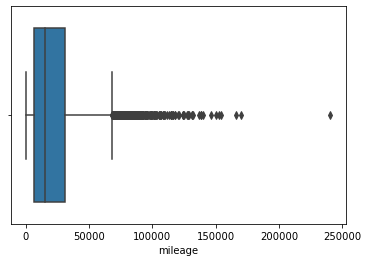

In [66]:
sns.boxplot(df.mileage)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mileage', ylabel='mpg'>

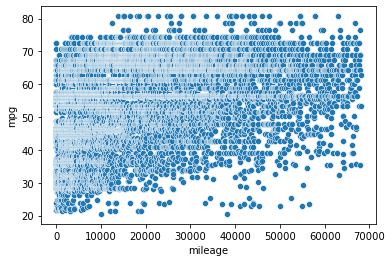

In [78]:
sns.scatterplot(x=df.mileage, y=df.mpg)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg'>

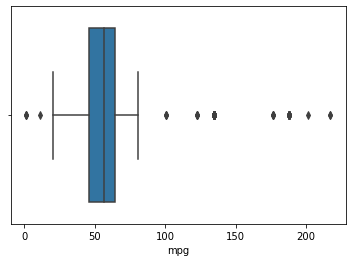

In [35]:
sns.boxplot(df.mpg)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='Count'>

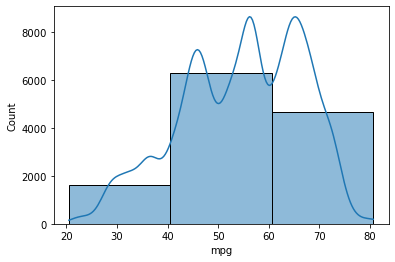

In [63]:
sns.histplot(df.mpg, bins=3, kde=True)

In [45]:
df = df.sort_values(by=['mpg'])

In [55]:
def remoeOutliers(df,column):
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 *IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

In [61]:
l , u = remoeOutliers(df,'mpg')

In [ ]:
df = df[ (df.mpg > l) & (df.mpg < u)]

In [65]:
df = df.sort_values(by=['mileage'])

In [68]:
l , u = remoeOutliers(df,'mileage')
print('Mileage Lower:{}, Upper:{}'.format(l,u))

Mileage Lower:-30709.0, Upper:68059.0


In [74]:
df['mileage'].quantile(.25)

6329.0

In [75]:
df['mileage'].quantile(.75)

31021.0

In [77]:
df = df[ (df.mileage > l) & (df.mileage < u)]

In [79]:
df.shape

(12189, 9)

In [85]:
df.drop(index=df[df.engineSize == 0].index, inplace=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='Count'>

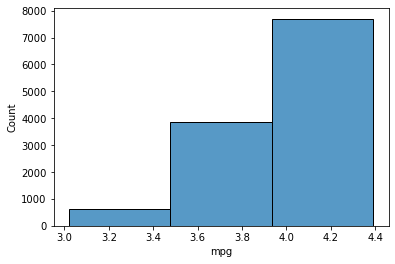

In [105]:
sns.histplot(np.log(df.mpg), bins=3)

In [95]:
df.price = np.log(df.price)

In [100]:
df.tax = np.log(df.tax)

In [103]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6127,2,2019,10.341581,3,1,0,4.976734,46.3,2.0
6128,2,2019,10.203407,3,1,0,4.976734,54.3,1.6
6126,2,2019,10.308786,3,1,0,4.976734,57.7,2.0
6129,6,2019,10.545210,3,1,0,4.976734,48.7,3.0
3015,2,2020,10.357108,3,9,0,4.976734,64.2,2.0


In [102]:
df.model = pd.Categorical(df.model).codes
df.transmission = pd.Categorical(df.transmission).codes
df.fuelType = pd.Categorical(df.fuelType).codes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

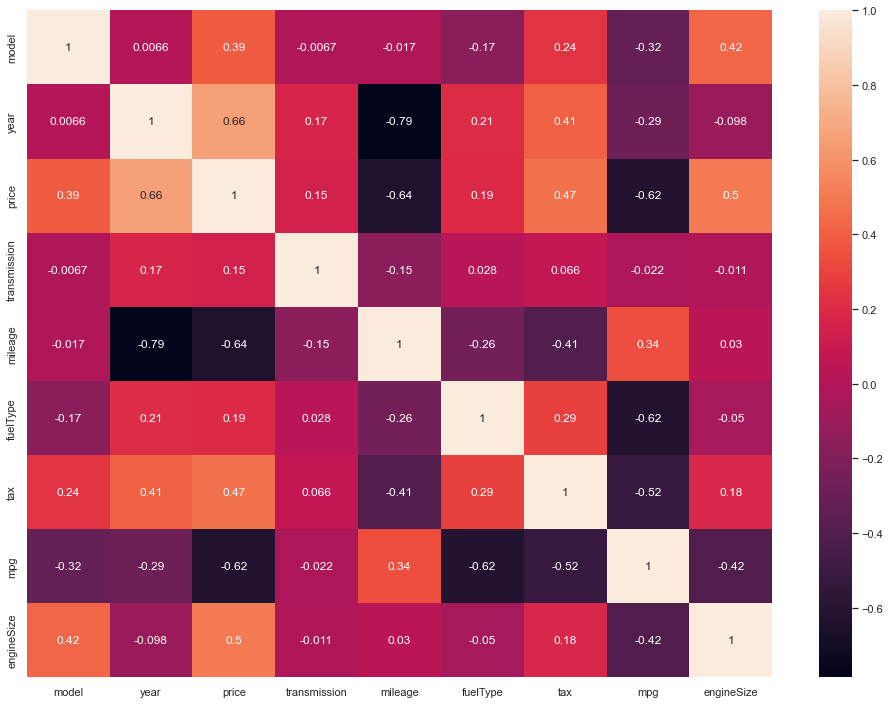

In [106]:
sns.set(rc={'figure.figsize':(16.7,12.27)})
sns.heatmap(df.corr(), annot=True)

In [136]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12179 entries, 6127 to 11247
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         12179 non-null  int8   
 1   year          12179 non-null  int32  
 2   price         12179 non-null  float64
 3   transmission  12179 non-null  int8   
 4   mileage       12179 non-null  int32  
 5   fuelType      12179 non-null  int8   
 6   mpg           12179 non-null  float64
 7   engineSize    12179 non-null  float64
dtypes: float64(3), int32(2), int8(3)
memory usage: 511.4 KB


In [121]:
df.mileage = df.mileage.astype('int32')
df.price = df.price.astype('float32')
df.tax = df.tax.astype('float32')
df.mpg = df.mpg.astype('float32')
df.engineSize = df.engineSize.astype('float32')

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error,r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import joblib
from sklearn.decomposition import PCA

In [108]:
from sklearn.model_selection import train_test_split

In [137]:
X = df.drop(['price'], axis=1).values
Y = df['price'].values

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [139]:
print('X_train:{}, X_test:{}'.format(X_train.shape, X_test.shape))

X_train:(9743, 7), X_test:(2436, 7)


In [152]:
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1',PCA(n_components=5)),
    ('lr_regression',LinearRegression())
])

pipeline1 = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1',PCA(n_components=5)),
    ('dt_regression',DecisionTreeRegressor())
])

pipeline2 = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1',PCA(n_components=5)),
    ('rf_regression',RandomForestRegressor())
])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
pipelines = [pipeline, pipeline1, pipeline2]

In [154]:
best_accuracy=0.0
best_regressor=0
best_pipeline=""

In [155]:
pipe_dict = {0: 'Linear Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [158]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    print('R2 Train:',r2_score(y_train,model.predict(X_train)))
    print("MSE Train: ",np.sqrt(mean_squared_log_error(np.round(y_train),np.round(model.predict(X_train)))))
    print("MSE Test: ",np.sqrt(mean_squared_log_error(np.round(y_test),np.round(model.predict(X_test)))))
    print("*"*60)
    print()

Linear Regression Test Accuracy: 0.8321036372424723
R2 Train: 0.8282747007064182
MSE Train:  0.02626106315544982
MSE Test:  0.026872877729230485
************************************************************

Decision Tree Test Accuracy: 0.8858464050198955
R2 Train: 0.9997331425791537
MSE Train:  0.0021592618690493585
MSE Test:  0.0243821066857615
************************************************************

RandomForest Test Accuracy: 0.9316148215554887
R2 Train: 0.9893399641450116
MSE Train:  0.013282434463691416
MSE Test:  0.021858225917801014
************************************************************



In [135]:
df.dropna(axis=1, inplace=True)

In [133]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [164]:
pipe = Pipeline([
    ('pca1',PCA(n_components=5)),
    ("regressor", RandomForestRegressor())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"regressor": [RandomForestRegressor()],
                 "regressor__n_estimators": [int(x) for x in np.linspace(start=2, stop=100, num=5)],
                 "regressor__max_depth":[int(x) for x in np.linspace(start=2, stop=10, num=3)],
                 "regressor__min_samples_leaf":[int(x) for x in np.linspace(start=2, stop=10, num=3)],
                 "regressor__max_leaf_nodes": [int(x) for x in np.linspace(start=2, stop=10, num=3)]}]
grid_param

[{'regressor': [RandomForestRegressor()],
  'regressor__n_estimators': [2, 26, 51, 75, 100],
  'regressor__max_depth': [2, 6, 10],
  'regressor__min_samples_leaf': [2, 6, 10],
  'regressor__max_leaf_nodes': [2, 6, 10]}]

In [ ]:
gridsearch = GridSearchCV(pipe, grid_param, cv=2, verbose=0,n_jobs=1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

<IPython.core.display.Javascript object>